In [73]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [12]:
img = cv2.imread('20241028_122740.png',0)
edges100 = cv2.Canny(img,100,100)
edges200 = cv2.Canny(img,200,200)
edges = cv2.Canny(img,100,200)

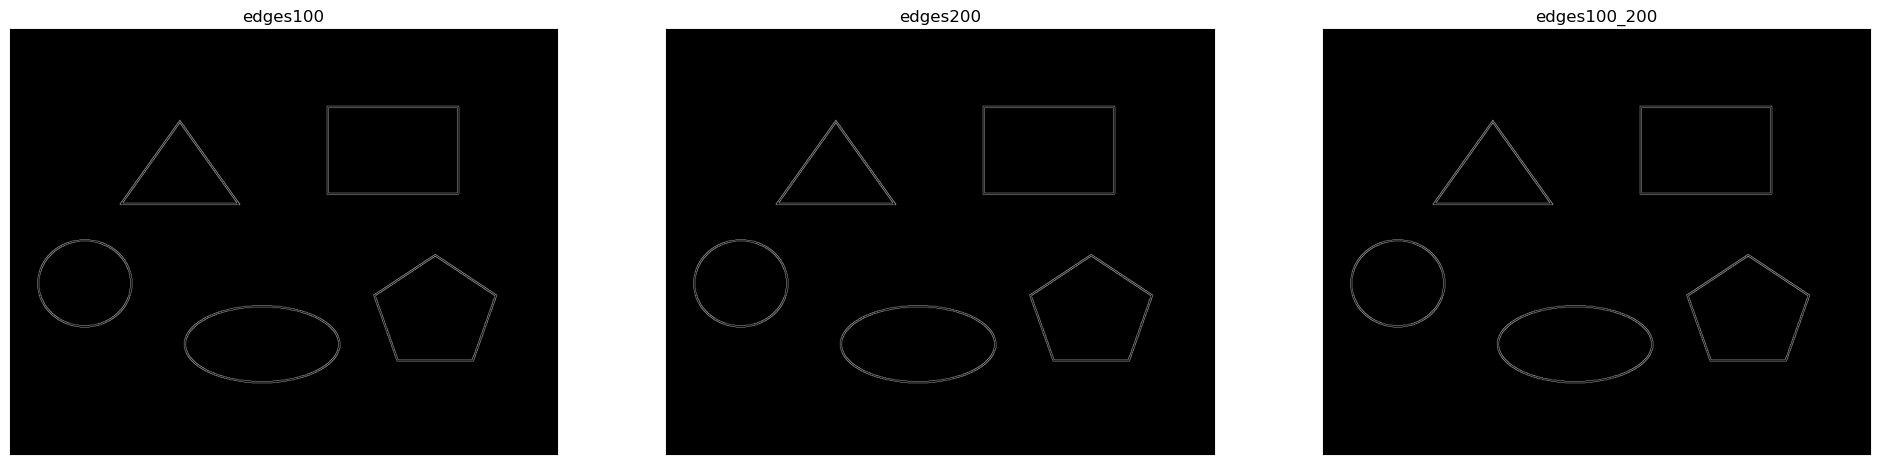

In [13]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(edges100,cmap = 'gray')
plt.title('edges100'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edges200,cmap = 'gray')
plt.title('edges200'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(edges,cmap = 'gray')
plt.title('edges100_200'), plt.xticks([]), plt.yticks([])
plt.show()


In [56]:
img = cv2.imread('20241028_122920.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),1)
ret, thresh = cv2.threshold(imgray,230,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [57]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = img.copy()
img1 = cv2.drawContours(img0, contours, 0, (0, 0, 0), 5)


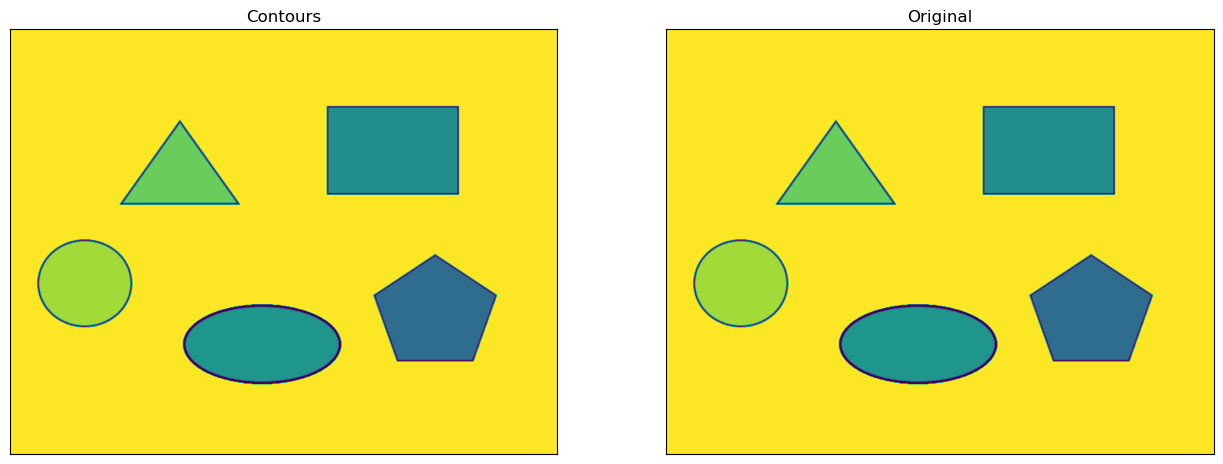

In [59]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,3),plt.imshow(img0)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Contours'), plt.xticks([]), plt.yticks([])
plt.show()


In [32]:
print(len(contours))

19


In [45]:
print(contours[11].size)

610


In [70]:
img = cv2.imread('20241028_122740.png',1)
edges100 = cv2.Canny(img,100,100)
edges200 = cv2.Canny(img,200,200)
edges = cv2.Canny(img,100,200)

In [71]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = img.copy()
img1 = cv2.drawContours(img, contours, -1, (255, 0, 0), 5)

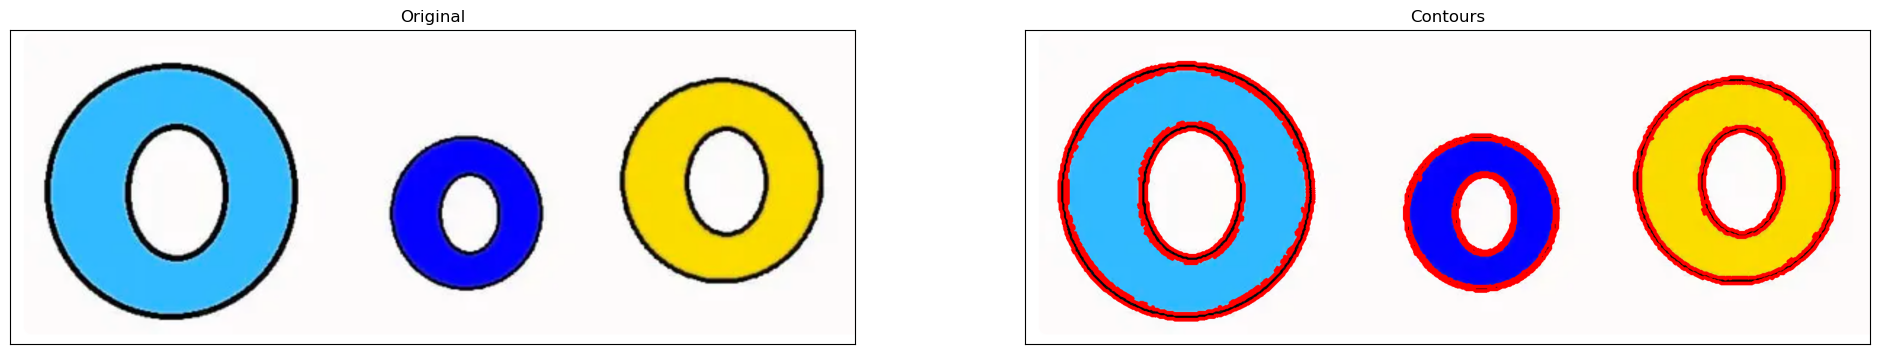

In [72]:
plt.figure(figsize=(24,8))
plt.subplot(1,2,1),plt.imshow(img0)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(img1)
plt.title('Contours'), plt.xticks([]), plt.yticks([])
plt.show()

In [74]:
img = cv2.imread('Canopic-Jar.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,230,255,0)

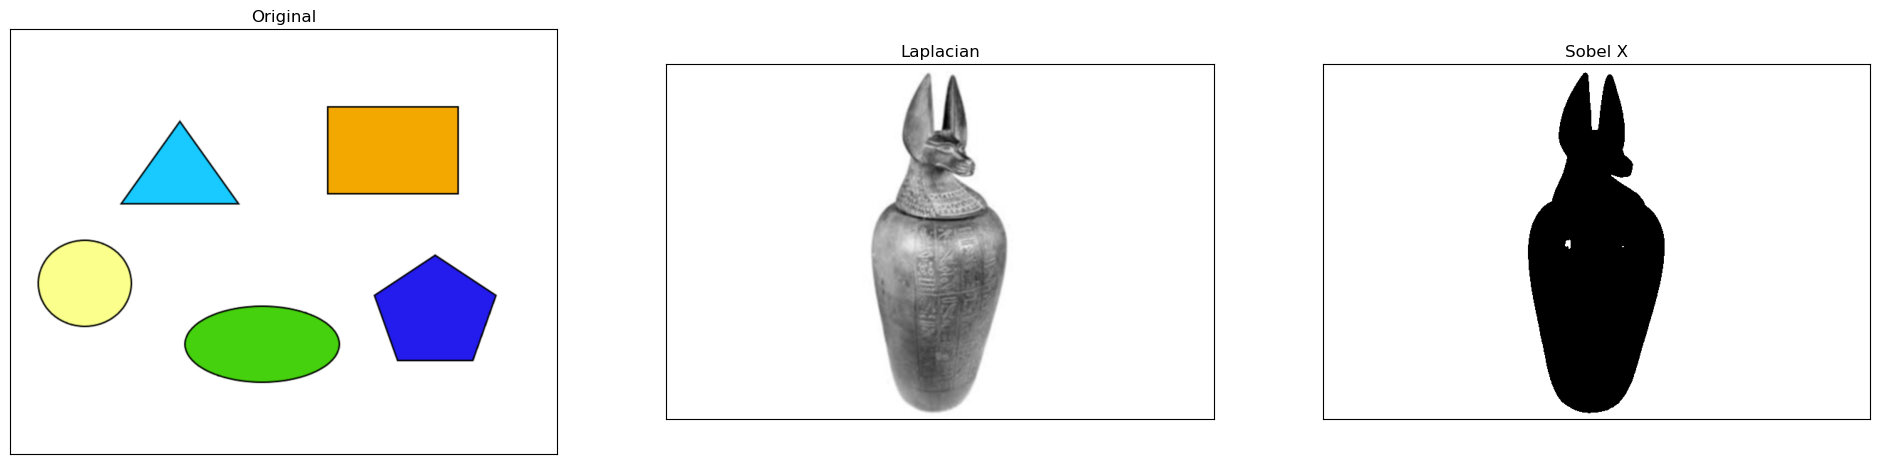

In [75]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [76]:
kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
kernel7 = np.ones((7,7),np.uint8)
erosion = cv2.erode(thresh, kernel5, iterations = 1)
#dilation = cv2.dilate(thresh, kernel5, iterations = 1)
#closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel5)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel5)


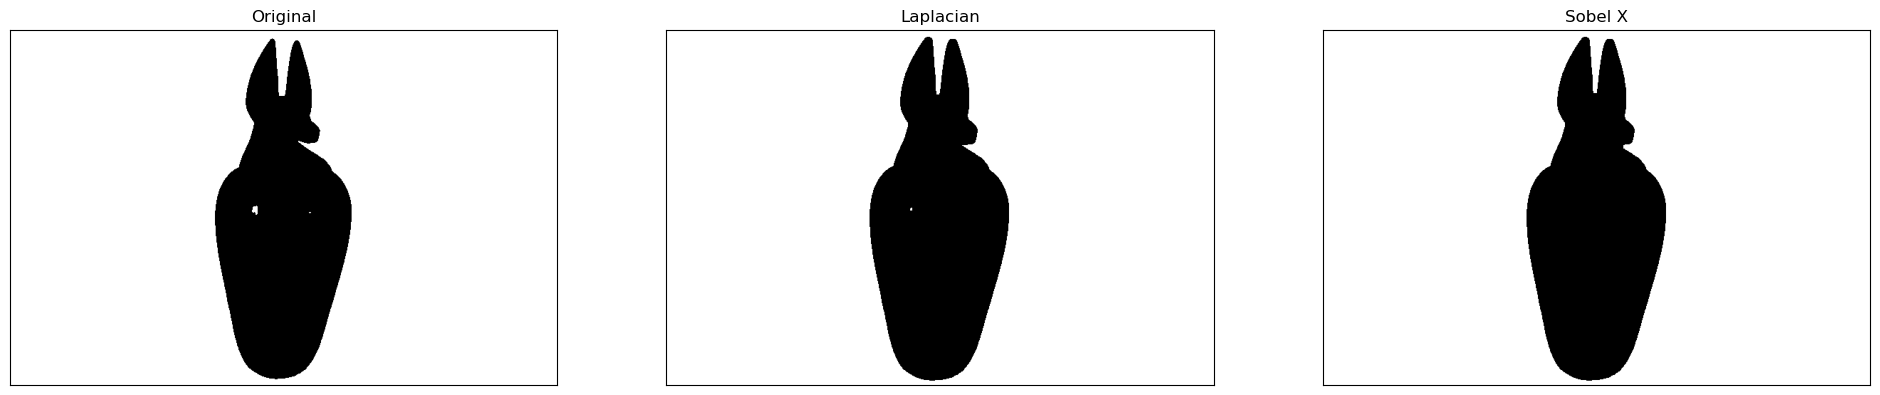

In [77]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(thresh,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(erosion,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(opening,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [82]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = img.copy()
img1 = img.copy()
img0 = cv2.drawContours(img0, contours, 0, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 1, (0,255,0), 3)


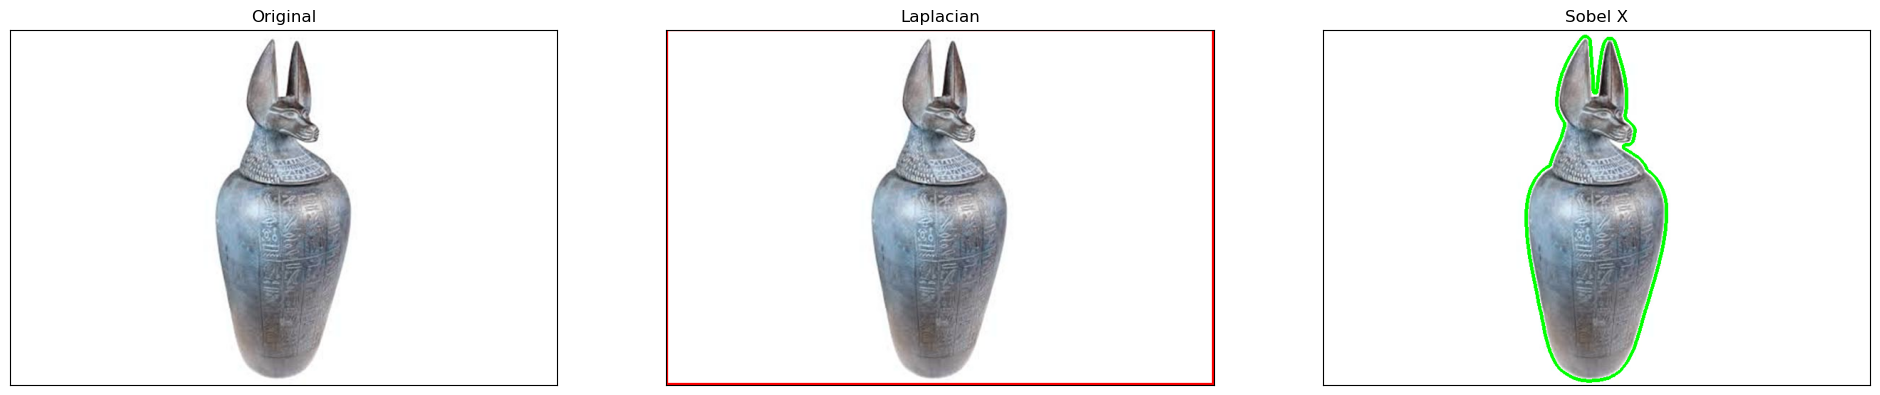

In [83]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [77]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)

{'m00': 62927.5, 'm10': 23972251.833333332, 'm01': 17254173.333333332, 'm20': 9258010841.25, 'm11': 6565935550.458333, 'm02': 5591924370.083333, 'm30': 3622969526197.75, 'm21': 2534770680116.5664, 'm12': 2124686980593.8333, 'm03': 1985060635109.7002, 'mu20': 125773616.49526978, 'mu11': -7047458.91993618, 'mu02': 860980070.4256153, 'mu30': 300248387.53125, 'mu21': 1674071213.0016098, 'mu12': -1693744479.6762085, 'mu03': -20342902161.712646, 'nu20': 0.03176205490489415, 'nu11': -0.0017797196533934241, 'nu02': 0.2174263333670341, 'nu30': 0.00030225917171298637, 'nu21': 0.0016852825835001557, 'nu12': -0.001705087603400001, 'nu03': -0.020479139982051066}


In [78]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [79]:
print(cx, cy)

380 274


In [80]:
area = cv2.contourArea(cnt)

In [81]:
print(area)

62927.5


In [82]:
perimeter = cv2.arcLength(cnt,True)

In [83]:
print(perimeter)

1361.7026588916779


In [92]:
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [93]:
print(epsilon)

13.61702658891678


In [94]:
print(approx)

[[[366  10]]

 [[380  89]]

 [[394  20]]

 [[410  18]]

 [[438 140]]

 [[422 167]]

 [[482 244]]

 [[437 448]]

 [[377 494]]

 [[318 452]]

 [[285 277]]

 [[291 223]]

 [[339 137]]

 [[335  62]]]


In [95]:
img1 = cv2.circle(img1,(cx,cy),5,(0,0,255),-1)

In [100]:
img2 = im.copy()
img2 = cv2.drawContours(img2, approx, -1, (0,0,255), 3)

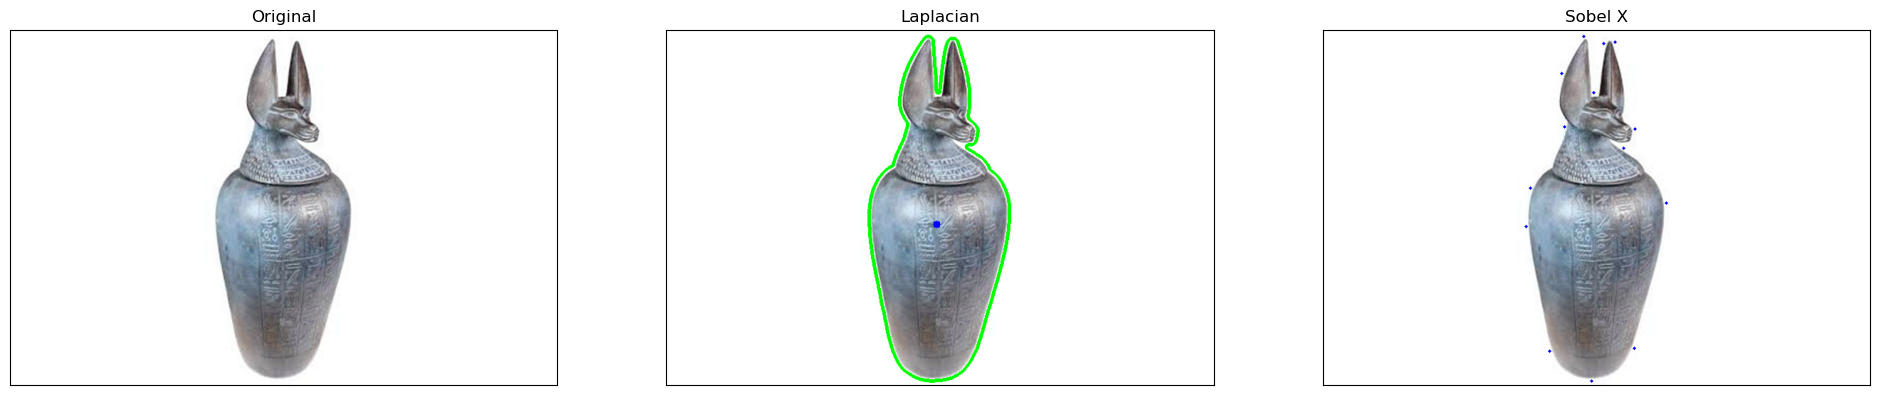

In [101]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [102]:
x,y,w,h = cv2.boundingRect(cnt)
img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)

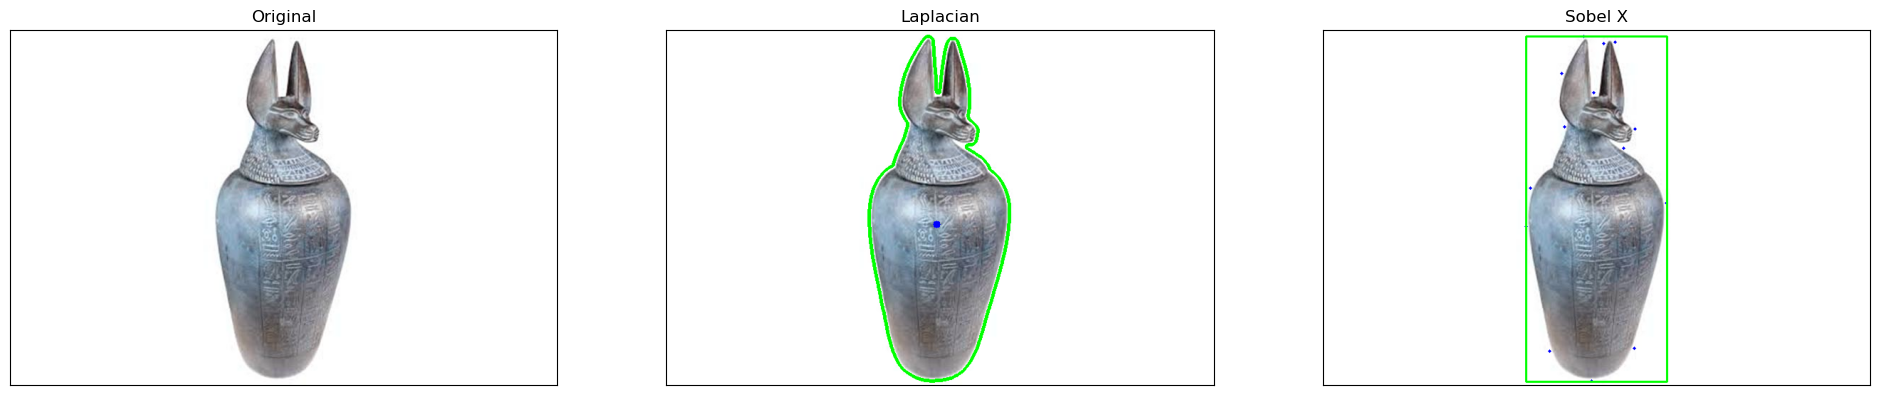

In [103]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [105]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img1 = cv2.drawContours(img1,[box],0,(0,0,255),2)

C:\Users\303\AppData\Local\Temp\ipykernel_1880\1864750122.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


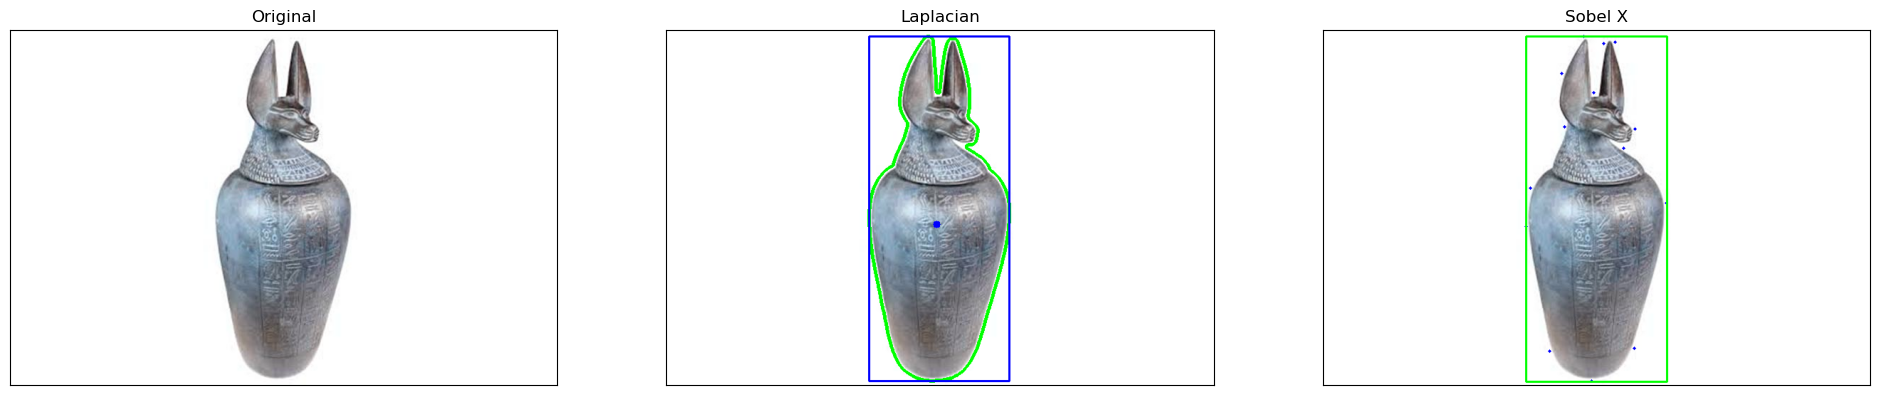

In [106]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [107]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img1 = cv2.circle(img1,center,radius,(0,255,0),2)

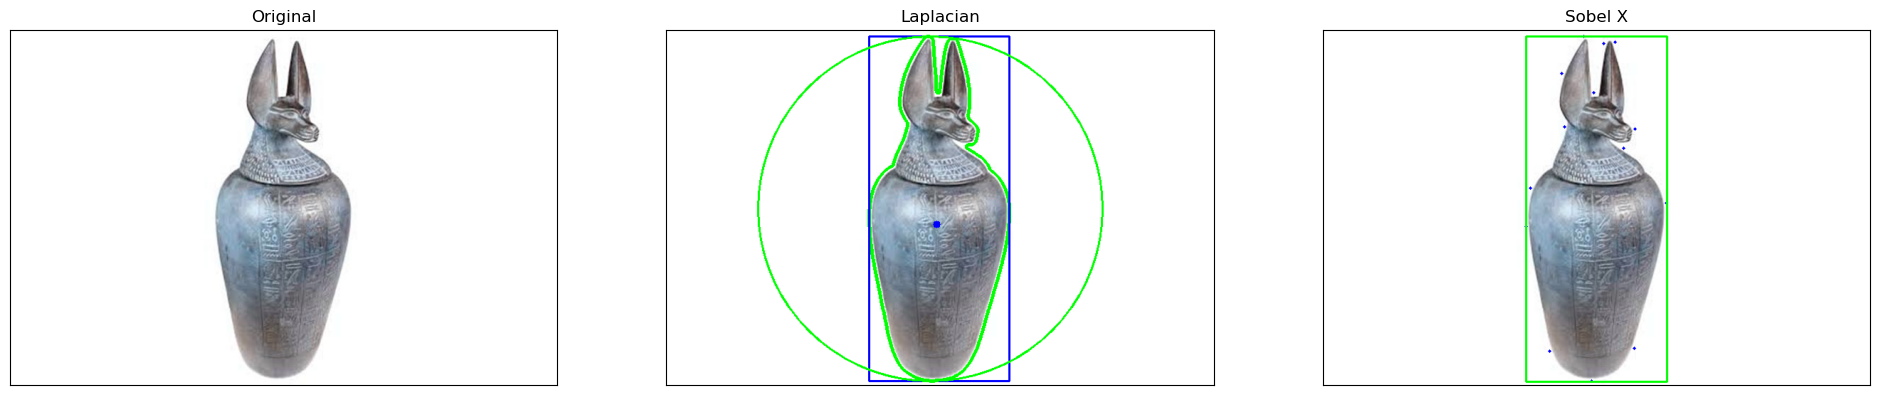

In [108]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [110]:
ellipse = cv2.fitEllipse(cnt)
img1 = cv2.ellipse(img1,ellipse,(0,255,0),2)

In [111]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img1 = cv2.line(img1,(cols-1,righty),(0,lefty),(0,255,0),2)

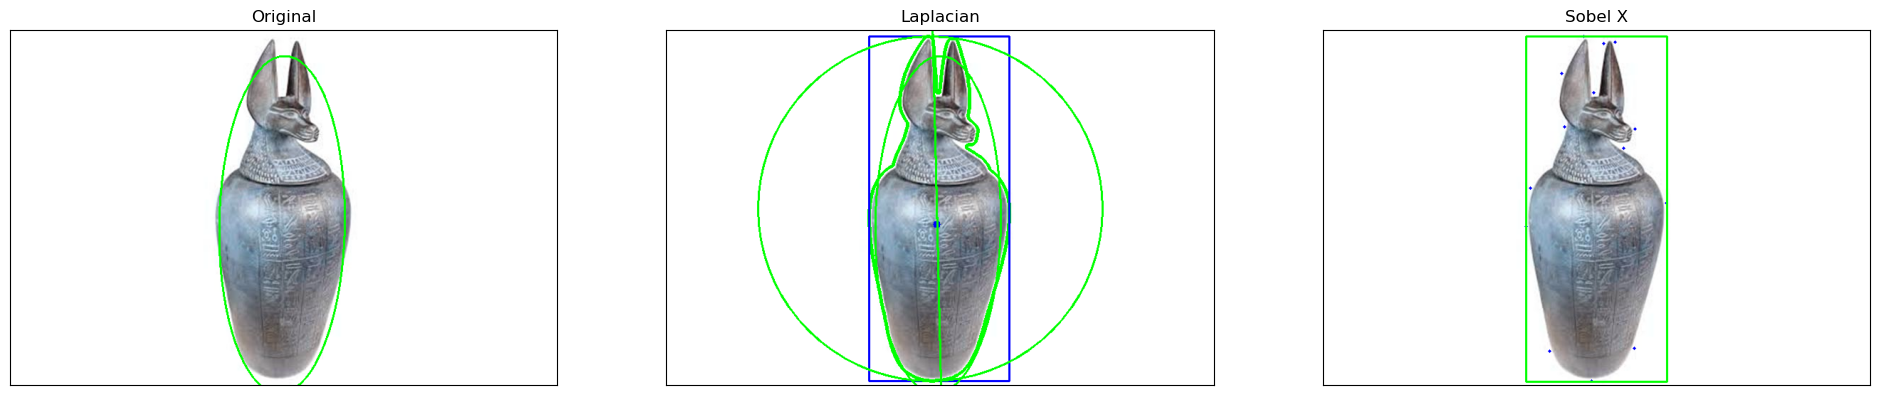

In [112]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()